In [1]:
import numpy as np # to load and manipulate data
import pandas as pd # to find mean and std deviation
import matplotlib.pyplot as plt  # to draw graphs 
from sklearn.tree import DecisionTreeClassifier # to build classifcation tree
from sklearn.tree import plot_tree # to draw a tree
from sklearn.model_selection import train_test_split # to split the data 
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay  # to draw confusion matrix

In [2]:
df = pd.read_csv('processed.cleveland.data', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
# ca may have any symbol that is making it object. lets check unique values
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
# similarly for thal
df['thal'].unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
# lets check how many values are missing 
len(df.loc[(df['ca'] == "?")  | (df['thal'] == "?")])

6

In [9]:
df.loc[(df['ca'] == "?")  | (df['thal'] == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
df_no_missing = df.loc[(df['ca'] != "?")  & (df['thal'] != "?")]

In [11]:
len(df_no_missing)

297

Now, finally we have cleaned the data

In [12]:
# now, we have to remove unecessary columns from the dataset

x = df_no_missing.drop('hd',axis = 1).copy()

In [13]:
x.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [14]:
y = df_no_missing['hd'].copy()

In [15]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

Now, we have x which we want to use to make prediction and y which has the data we want to predict

In [16]:
# performing one hot encoding on cp
x_encoded = pd.get_dummies(x,columns= ['cp','restecg','slope','thal'])

x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [17]:
# for y, we have 5 levels of classification based on how sever it is. lets just convert it into two i.e. 0 or 1

y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y. unique()

array([0, 1], dtype=int64)

Now, the interesting part have started. Lets build our classifiction tree!!

In [18]:
print("Shape of x_encoded:", x_encoded.shape)
print("Shape of y:", y.shape)


Shape of x_encoded: (297, 22)
Shape of y: (297,)


In [19]:
# splitting the data into train test
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y,random_state = 42)

# create decision tree and fit the data into it
clf_dt = DecisionTreeClassifier(random_state= 42)
clf_dt = clf_dt.fit(x_train,y_train)

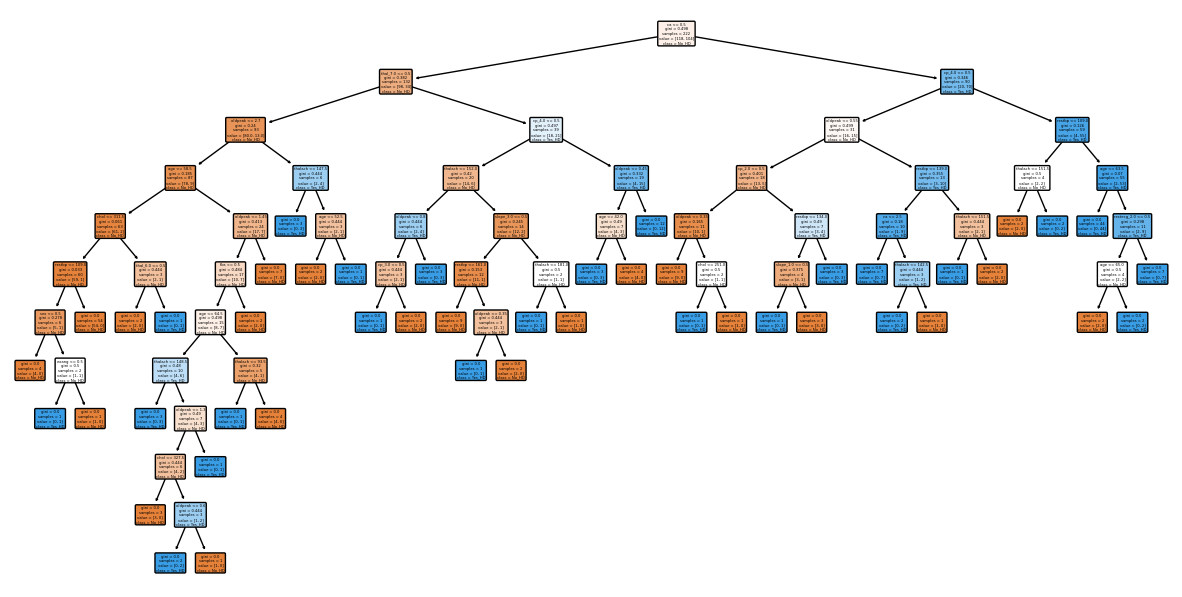

In [20]:
# Let's plot the tree
plt.figure(figsize= (15,7.5))
plot_tree(clf_dt,filled = True,rounded= True,class_names= ['No_HD','Yes_HD'], feature_names= x_encoded.columns);

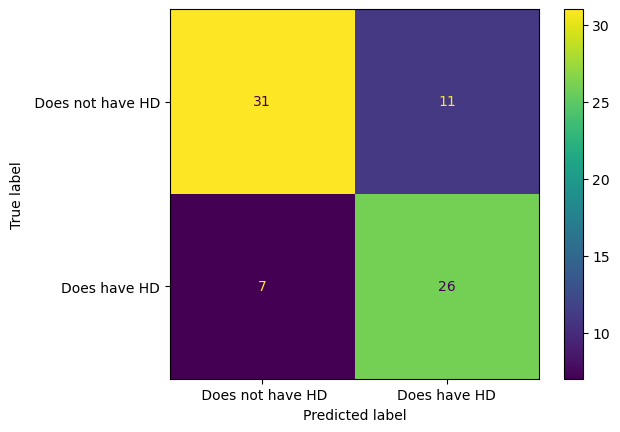

In [21]:
# lets create confusion matrix 
ConfusionMatrixDisplay.from_estimator(clf_dt,x_test,y_test, display_labels= [' Does not have HD', 'Does have HD'])

In [22]:
path = clf_dt.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas :
    clf_dt = DecisionTreeClassifier(random_state= 0,ccp_alpha= ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)


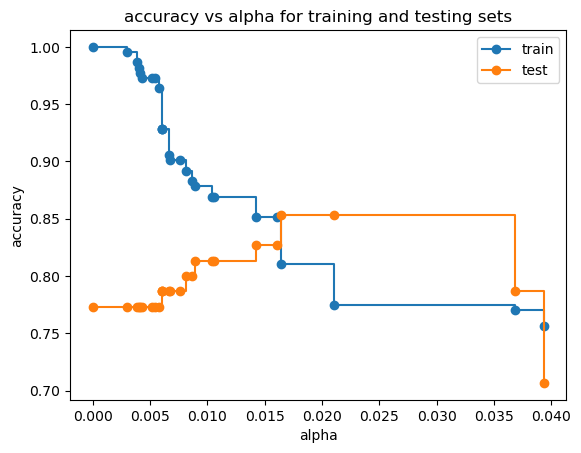

In [23]:
# now lets try the accuracy using alpha

train_scores = [clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o',label = 'train',drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o',label = 'test',drawstyle = "steps-post")
ax.legend()
plt.show()


from this grpah, we got the sweet point in btw where both the values have better accuracy and such point have alpha = 0.016

# Cross  validation

<Axes: xlabel='tree'>

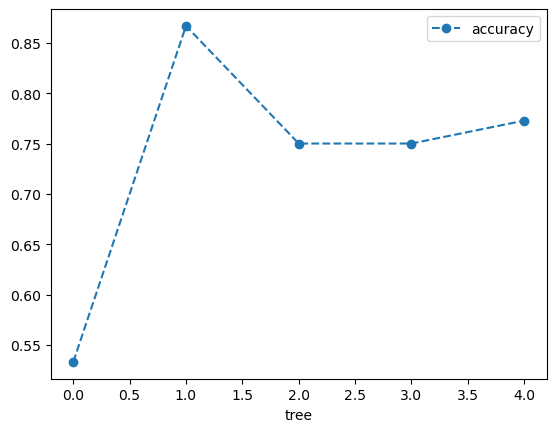

In [24]:
clf_dt = DecisionTreeClassifier(random_state= 42,ccp_alpha = 0.016)

scores = cross_val_score(clf_dt,x_train,y_train,cv = 5)
df = pd.DataFrame(data = {'tree': range(5),'accuracy' : scores})

df.plot(x = 'tree',y = 'accuracy',marker = 'o',linestyle = '--')

       alpha  mean_accuracy       std
0   0.000000       0.702525  0.095323
1   0.002953       0.702525  0.095323
2   0.003861       0.702525  0.095323
3   0.004054       0.702525  0.095323
4   0.004095       0.702525  0.095323
5   0.004294       0.702525  0.095323
6   0.005148       0.697980  0.096733
7   0.005413       0.702525  0.108866
8   0.005788       0.720707  0.110520
9   0.006006       0.720707  0.110520
10  0.006006       0.720707  0.110520
11  0.006006       0.720707  0.110520
12  0.006676       0.720707  0.110520
13  0.006757       0.720707  0.110520
14  0.007574       0.720707  0.110520
15  0.008115       0.729697  0.105518
16  0.008687       0.734141  0.099311
17  0.008899       0.734141  0.099311
18  0.010382       0.725253  0.081248
19  0.010578       0.729798  0.080596
20  0.014225       0.752323  0.091956
21  0.016041       0.734545  0.109433
22  0.016425       0.734545  0.109433
23  0.021031       0.702727  0.112082
24  0.036800       0.666970  0.076526
25  0.039345

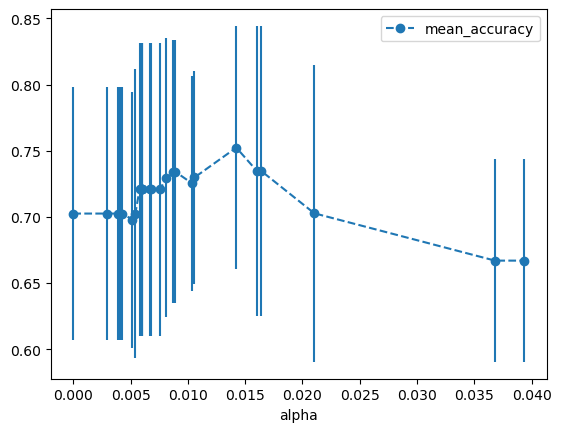

In [29]:
# creating an array to store the result of each fold of cross validation
alpha_loop_values = []

for ccp_alpha in ccp_alphas :
    clf_dt = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt,x_train,y_train,cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,columns= ['alpha','mean_accuracy','std'])
alpha_results.plot(x = 'alpha',y = 'mean_accuracy',yerr = 'std',marker = 'o',linestyle = '--')
print(alpha_results)

In the above cross validation graph we got to know that alpha = 0.014 is more accurate value


In [30]:
print(type(alpha_results))

<class 'pandas.core.frame.DataFrame'>


In [31]:
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]




,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


In [32]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']

ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [33]:
# convert ideal ccp alpha from series to float value
ideal_ccp_alpha = float(ideal_ccp_alpha)

ideal_ccp_alpha

C:\Users\khush\AppData\Local\Temp\ipykernel_10180\3753215354.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha = float(ideal_ccp_alpha)


0.014224751066856332

We have the ideal value of alpha, now lets build our final classification tree

In [34]:
clf_dt_pruned = DecisionTreeClassifier(random_state= 42,ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(x_train,y_train)

Lets build confusion matrix to know if it works better.

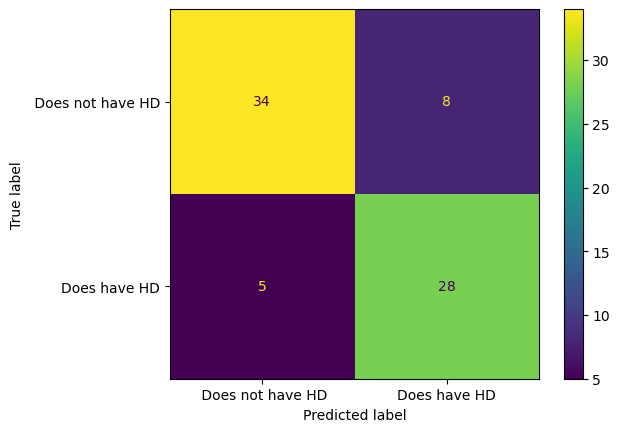

In [35]:
# lets create confusion matrix 
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,x_test,y_test, display_labels= [' Does not have HD', 'Does have HD'])

Now, we can see accuracy have been increased. We can build our final decision tree

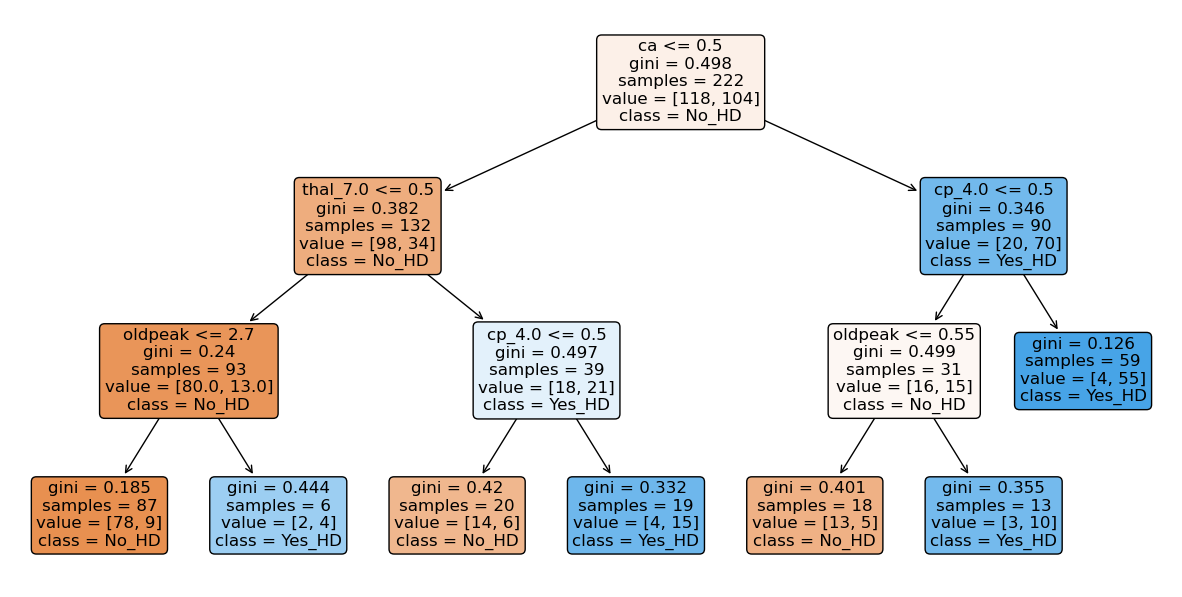

In [36]:
# Let's plot the tree
plt.figure(figsize= (15,7.5))
plot_tree(clf_dt_pruned,filled = True,rounded= True,class_names= ['No_HD','Yes_HD'], feature_names= x_encoded.columns);